## Introduction :

    - In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey here and the survey for the DETE here.

    - In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

        - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
        - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

    - They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

    - A data dictionary wasn't provided with the dataset. In a job setting, we'd make sure to meet with a manager to confirm the definitions of the data. For this project, we'll use our general knowledge to define the columns.

    - Below is a preview of a couple columns we'll work with from the dete_survey.csv:

        - ID: An id used to identify the participant of the survey
        - SeparationType: The reason why the person's employment ended
        - Cease Date: The year or month the person's employment ended
        - DETE Start Date: The year the person began employment with the DETE

    - Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

        - Record ID: An id used to identify the participant of the survey
        - Reason for ceasing employment: The reason why the person's employment ended
        - LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


## 1.Reading-in the datasets and initial exploration : 

In [1]:
import pandas as pd
import numpy as np 
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='Latin-1')

In [2]:
dete_survey.info()
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [7]:
print(dete_survey['SeparationType'].value_counts(dropna=False))
print(dete_survey['DETE Start Date'].value_counts(dropna=False))
print(tafe_survey['Reason for ceasing employment'].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64
Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1975          21
2013          21
1970          21
2005          20
1990          20
1996          19
1999          19
2000          18
1992          18
1991          18
2004          18
1989          17
1976          15
1978          15
2002          15
2003          15
1988          15
1979          14
1974          14
1998          14
1997          14
1980          14
1995          14
1993          13
1986          12
1972    

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## 2.Reading Not Stated in as NaN for the dete_survey dataset and dropping useless columns:

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [10]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## 3.Remaining the columns:

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [12]:
mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [13]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 4.Selecting only the data for survey respondents who resigned:

In [15]:
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [16]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
print(dete_resignations['separationtype'].value_counts())
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64
Resignation    340
Name: separationtype, dtype: int64


## 5.Cleaning the years columns in each dataset :

In [17]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
dete_resignations['cease_date'].value_counts()


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

- There aren't any major issues with the years.

## 6.Creating an institute_service column in dete_resignations:

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

- In the last screen, we created a new institute_service column that we'll use to analyze survey respondents according to their length of employment.

## 7.Identifying any employees who resigned because they were dissatisfied:

- Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:
    - tafe_resignations:
        - Contributing Factors. Dissatisfaction
        - Contributing Factors. Job Dissatisfaction
        - Contributing Factors. Interpersonal Conflict
        - Contributing Factors. Travel
    - dafe_resignations:
        - interpersonal_conflicts
        - job_dissatisfaction
        - dissatisfaction_with_the_department
        - physical_work_environment
        - lack_of_recognition
        - lack_of_job_security
        - work_location
        - employment_conditions
        - work_life_balance
        - workload

In [21]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [22]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Interpersonal Conflict'].value_counts(dropna=False)

-                         308
Interpersonal Conflict     24
NaN                         8
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Travel'].value_counts(dropna=False)

-         315
Travel     17
NaN         8
Name: Contributing Factors. Travel, dtype: int64

In [25]:
def update_val(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else :
        return True
cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict',
'Contributing Factors. Travel']
for col in cols :
    tafe_resignations[col] = tafe_resignations[col].apply(update_val)
    print(tafe_resignations[col].value_counts(dropna=False))


False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64
False    308
True      24
NaN        8
Name: Contributing Factors. Interpersonal Conflict, dtype: int64
False    315
True      17
NaN        8
Name: Contributing Factors. Travel, dtype: int64


In [26]:
tafe_resignations['dissatisfied'] = tafe_resignations[cols].any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

In [27]:
cols = ['interpersonal_conflicts', 'job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment',
'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
dete_resignations['dissatisfied'] = dete_resignations[cols].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [28]:
print(tafe_resignations_up['dissatisfied'].value_counts(dropna=False))
print(dete_resignations_up['dissatisfied'].value_counts(dropna=False))

False    223
True     109
NaN        8
Name: dissatisfied, dtype: int64
False    157
True     154
Name: dissatisfied, dtype: int64


## 8.Combining the datasets :

In [29]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [30]:
mapping = {
    'Gender. \xa0\xa0\xa0\xa0What is your Gender?':'gender',
    'CurrentAge. \xa0\xa0\xa0\xa0Current Age':'age',
    'Employment Type. \xa0\xa0\xa0\xa0Employment Type':'employment_status',
    'Classification. \xa0\xa0\xa0\xa0Classification':'position'
}
tafe_resignations_up = tafe_resignations_up.rename(mapping, axis=1)
tafe_resignations_up.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)',
       'dissatisfied', 'institute'],
      dtype='object')

In [31]:
combined = pd.concat([tafe_resignations_up, dete_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

C:\Users\Cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
LengthofServiceCurrent. Length of Service at current workplace (in years)    290
employment_conditions                                                        311
ill_health                  

In [32]:
combined_updated = combined.dropna(axis=1, thresh=500)
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

## 9.Categorizing the values in the institute_service column :

In [33]:
combined_updated['institute_service'].astype('str').str.extract(r"(\d)")
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").astype(float)
combined_updated['institute_service_up'].value_counts(dropna=False)

C:\Users\Cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 2.0      14
 9.0      14
 13.0      8
 8.0       8
 15.0      7
 10.0      6
 14.0      6
 17.0      6
 22.0      6
 12.0      6
 18.0      5
 16.0      5
 24.0      4
 23.0      4
 19.0      3
 32.0      3
 39.0      3
 21.0      3
 30.0      2
 26.0      2
 36.0      2
 28.0      2
 25.0      2
 35.0      1
 38.0      1
 34.0      1
 33.0      1
 49.0      1
 41.0      1
 27.0      1
 42.0      1
 29.0      1
 31.0      1
Name: institute_service_up, dtype: int64

In [34]:
def categorize(val):
    if val < 3.0:
        return 'New'
    elif 3 <= val < 7.0:
        return 'Experienced'
    elif 7 <= val < 11.0:
        return 'Established'
    elif pd.isnull(val):
        return np.nan
    elif val >= 11 : 
        return 'Veteran'
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize)
combined_updated['service_cat'].value_counts(dropna=False)
        

C:\Users\Cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

- We created a service_cat column, that categorizes employees according to the amount of years spent in their workplace:

    - New: Less than 3 years at a company
    - Experienced: 3-6 years at a company
    - Established: 7-10 years at a company
    - Veteran: 11 or more years at a company


## 10. Initial Analysis of resigning due to dissatisfaction with the job by length of service :

In [35]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    380
True     263
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False).copy()
combined_updated['dissatisfied'].value_counts(dropna=False)

C:\Users\Cex\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


False    388
True     263
Name: dissatisfied, dtype: int64

In [37]:
combined_dissatisfied = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

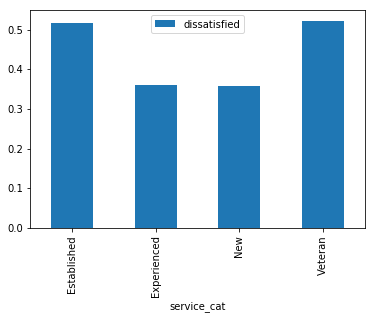

In [38]:
%matplotlib inline
combined_dissatisfied.plot(kind='bar')

- From the initial analysis above : employees with 3 years and less of service and employeed with 11 years and more of service, are more likely to resign due to some kind of dissatisfaction with the job than employees with service length between 3 and 11 years.